In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]
import os

In [9]:
%run -i "gcmc.py"

In [10]:
os.listdir("data2")
output_data = pd.DataFrame()

for file in os.listdir("data2/"):
    if file.endswith(".csv"):
        subset = pd.read_csv("data2/" + file)
        output_data = output_data.append( subset )
    
print( output_data.shape )
output_data.head()

(900, 14)


,T_res,P_res,yco_res,yco_sim,P_sim,E_sim,rhoco,rhome,yco_s,P_s,rhoco_s,rhome_s,E_s,time
0,30.0,10.0,0.0,0.0,10.009165,-11.946176,0.0,0.000244,0.0,1.919404,0.0,0.000046,5.055429,54.079066
1,30.0,10.0,0.0,0.0,9.879261,-11.700531,0.0,0.000239,0.0,1.953836,0.0,0.000046,5.196423,54.304163
2,30.0,10.0,0.0,0.0,10.156728,-11.997345,0.0,0.000246,0.0,1.997451,0.0,0.000047,5.035646,54.147321
3,30.0,20.0,0.0,0.0,19.855052,-24.484142,0.0,0.000486,0.0,3.213108,0.0,0.000071,6.936032,99.137092
4,30.0,20.0,0.0,0.0,20.046538,-25.340263,0.0,0.000492,0.0,3.174771,0.0,0.000070,7.117691,99.029977


In [11]:
ys = [0.0, 0.25, 0.5, 0.75, 1.0]
Ts = [30.0, 45.0, 60.0]
target_data = output_data
caption_txt = "Reservoir EOS: Peng Robinson; Unit Cell Length: 45A; Steps per Cycle: 100; Equilibration Cycles: 10000; Production Cycles: 1000"
title_txt = "Determining Efficacy of Replicating Gas Mixtures"

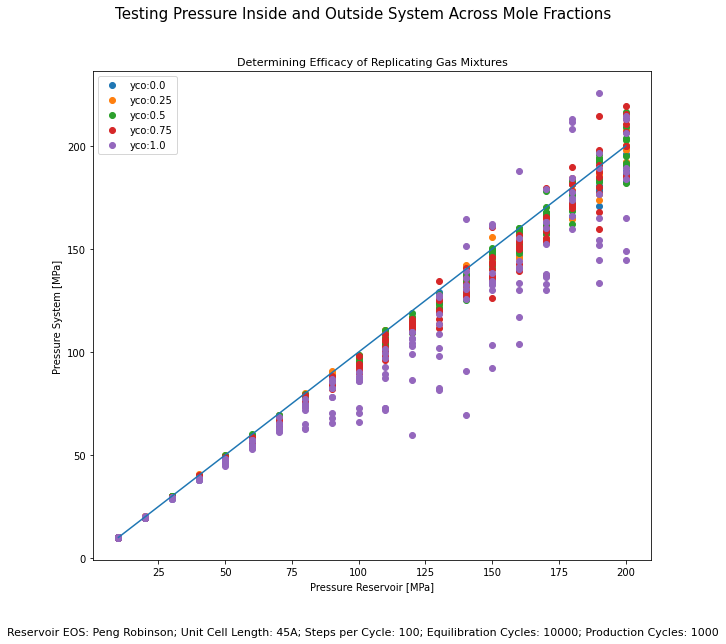

In [12]:
for y in ys:
    target_data = output_data[output_data.yco_res == y]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim,
        label = "yco:" + str(y)
    )
plt.plot([10,200], [10,200])
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Pressure System [MPa]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=11)
plt.suptitle("Testing Pressure Inside and Outside System Across Mole Fractions", fontsize = 15)
plt.legend()


Text(0.5, 0.98, 'Testing Pressure Inside and Outside System Across Temperatures')

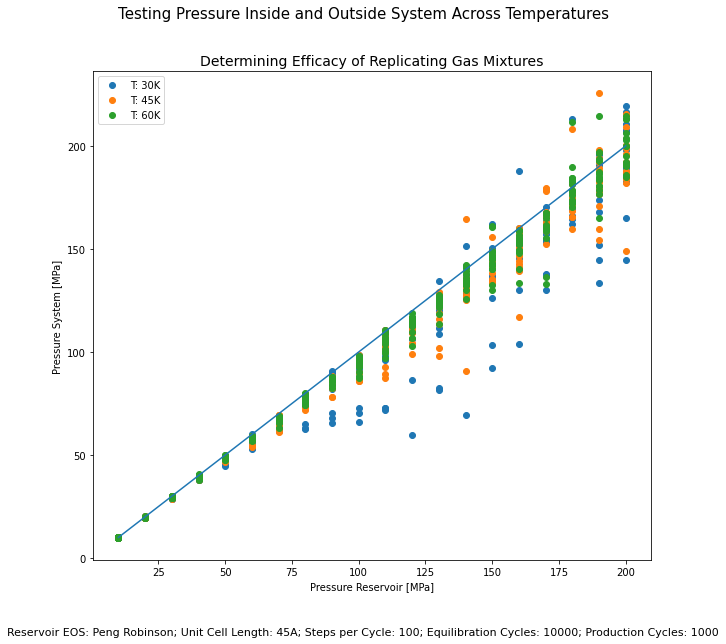

In [13]:
for T in Ts:
    target_data = output_data[output_data.T_res == T]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim,
        label = "T: " + str(round(T)) + "K"
    )
plt.plot([10,200], [10,200])
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Pressure System [MPa]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Testing Pressure Inside and Outside System Across Temperatures", fontsize = 15)

Text(0.5, 0.98, 'Testing Pressure Inside and Outside System Across Temperatures For Pure CO2')

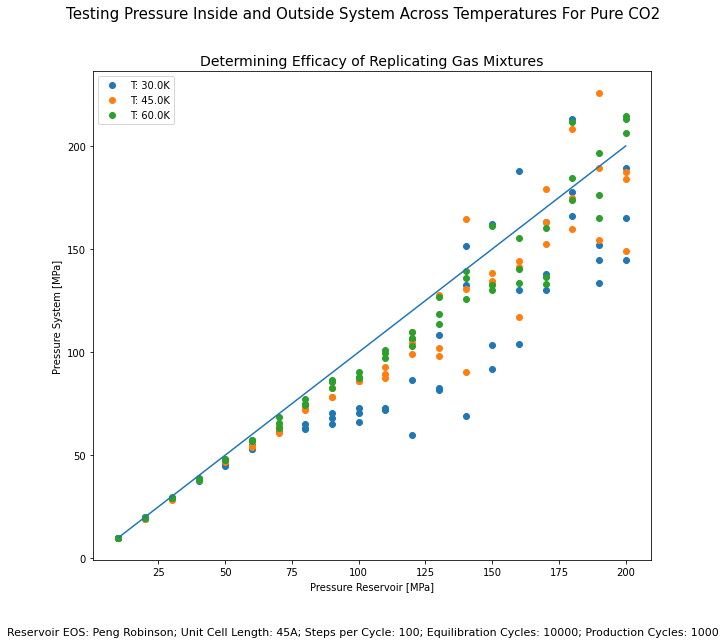

In [14]:
for T in Ts:
    target_data = output_data[output_data.T_res == T]
    target_data = target_data[target_data.yco_res == 1.0]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim,
        label = "T: " + str(T) + "K"
    )
plt.plot([10,200], [10,200])
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Pressure System [MPa]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.legend()
plt.suptitle("Testing Pressure Inside and Outside System Across Temperatures For Pure CO2", fontsize = 15)

Text(0.5, 0.98, 'Testing Pressure Inside and Outside System Across Mole Fractions Without Pure CO2')

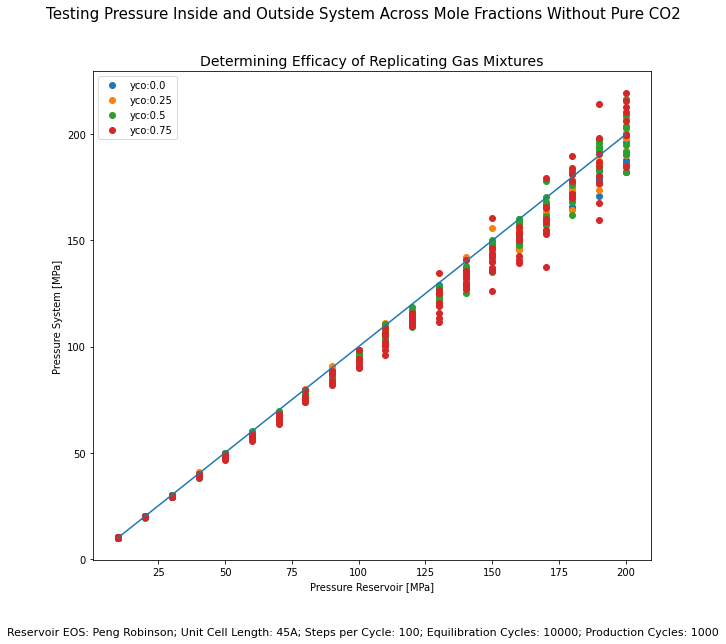

In [15]:
for y in [0.0, 0.25, 0.5, 0.75]:
    target_data = output_data[output_data.yco_res == y]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim,
        label = "yco:" + str(y)
    )
plt.plot([10,200], [10,200])
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Pressure System [MPa]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Testing Pressure Inside and Outside System Across Mole Fractions Without Pure CO2", fontsize = 15)

Text(0.5, 0.98, 'Testing Pressure Inside and Outside System Across Mole Fractions')

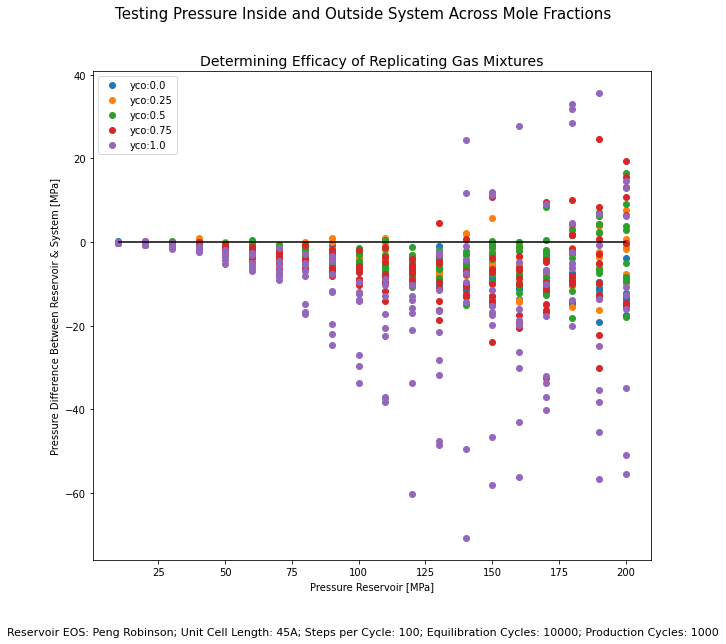

In [16]:
for y in ys:
    target_data = output_data[output_data.yco_res == y]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim - target_data.P_res,
        label = "yco:" + str(y)
    )
plt.hlines(y=0, xmin = 10, xmax = 200)
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Pressure Difference Between Reservoir & System [MPa]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Testing Pressure Inside and Outside System Across Mole Fractions", fontsize = 15)

Text(0.5, 0.98, 'Testing Pressure Inside and Outside System Across Temperatures')

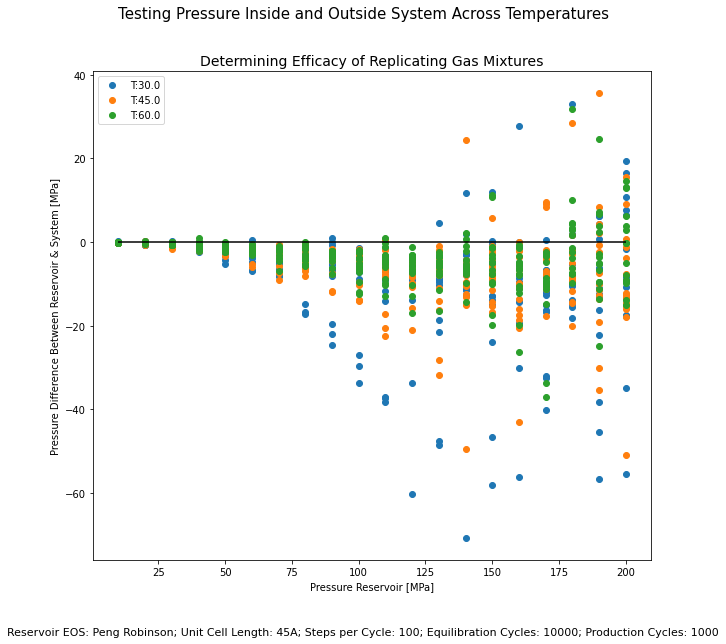

In [17]:

for T in Ts:
    target_data = output_data[output_data.T_res == T]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim - target_data.P_res,
        label = "T:" + str(T)
    )
plt.hlines(y=0, xmin = 10, xmax = 200)
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Pressure Difference Between Reservoir & System [MPa]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Testing Pressure Inside and Outside System Across Temperatures", fontsize = 15)


Text(0.5, 0.98, 'Testing Pressure Inside and Outside System Across Temperatures For Pure CO2')

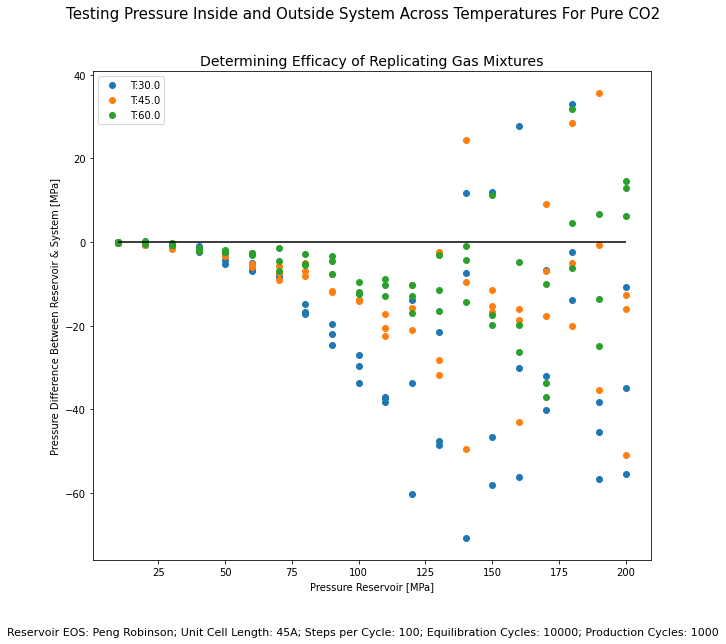

In [18]:
for T in Ts:
    target_data = output_data[output_data.T_res == T]
    target_data = target_data[target_data.yco_res == 1.0]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim- target_data.P_res,
        label = "T:" + str(T)
    )
plt.hlines(y=0, xmin = 10, xmax = 200)
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Pressure Difference Between Reservoir & System [MPa]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Testing Pressure Inside and Outside System Across Temperatures For Pure CO2", fontsize = 15)

Text(0.5, 0.98, 'Testing Pressure Inside and Outside System Across Pressures Without Pure CO2')

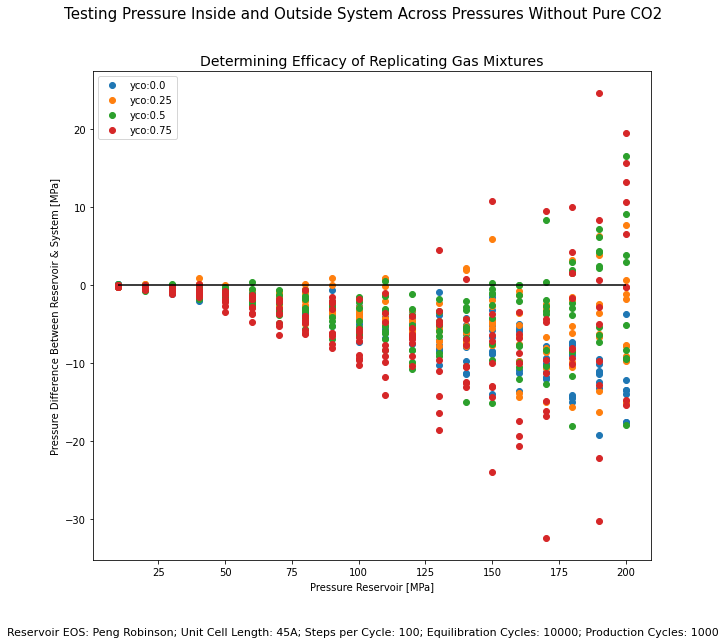

In [19]:
for y in [0.0, 0.25, 0.5, 0.75]:
    target_data = output_data[output_data.yco_res == y]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim - target_data.P_res,
        label = "yco:" + str(y)
    )
plt.hlines(y=0, xmin = 10, xmax = 200)
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Pressure Difference Between Reservoir & System [MPa]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Testing Pressure Inside and Outside System Across Pressures Without Pure CO2", fontsize = 15)

In [20]:
agg_data = output_data.groupby(['T_res','P_res','yco_res']).agg({'P_sim':['mean']}).reset_index()
agg_data.columns = ['T_res','P_res','yco_res','P_sim']
agg_data.head()

,T_res,P_res,yco_res,P_sim
0,30.0,10.0,0.00,10.015051
1,30.0,10.0,0.25,9.864072
2,30.0,10.0,0.50,9.929732
3,30.0,10.0,0.75,9.831664
4,30.0,10.0,1.00,9.968804


Text(0.5, 0.98, 'Testing Pressure Inside and Outside System but with Replicates averaged')

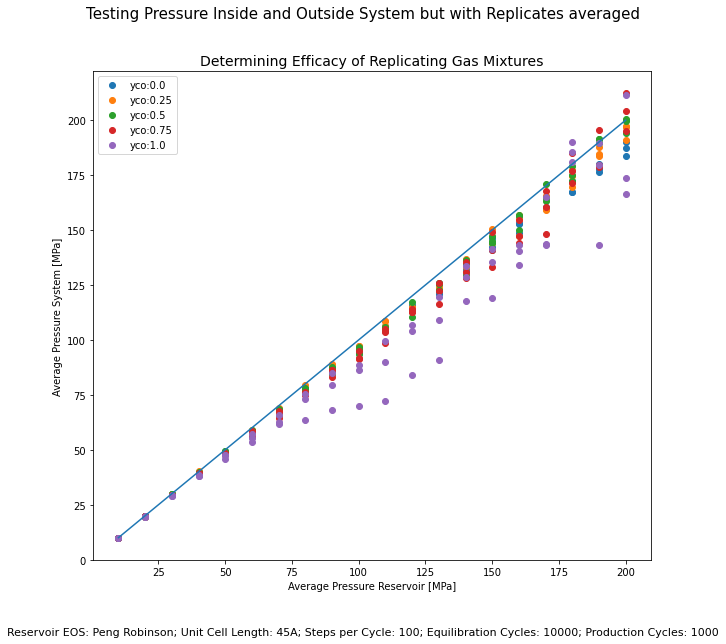

In [21]:
for y in ys:
    target_data = agg_data[agg_data.yco_res == y]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim,
        label = "yco:" + str(y)
    )
plt.plot([10,200], [10,200])
plt.legend()
plt.xlabel("Average Pressure Reservoir [MPa]")
plt.ylabel("Average Pressure System [MPa]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Testing Pressure Inside and Outside System but with Replicates averaged", fontsize = 15)

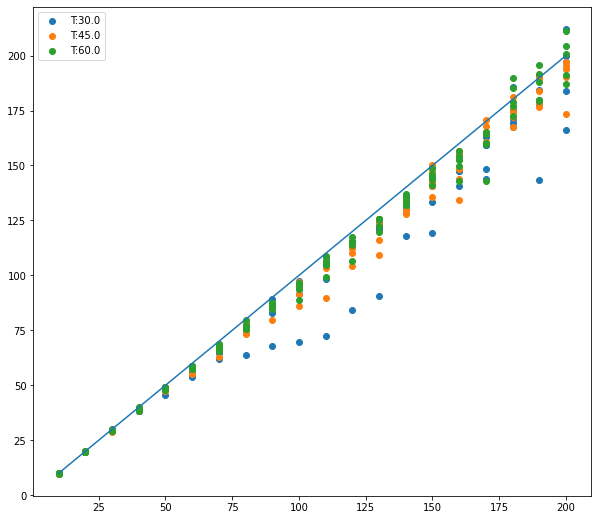

In [22]:
for T in Ts:
    target_data = agg_data[agg_data.T_res == T]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim,
        label = "T:" + str(T)
    )
plt.plot([10,200], [10,200])
plt.legend()

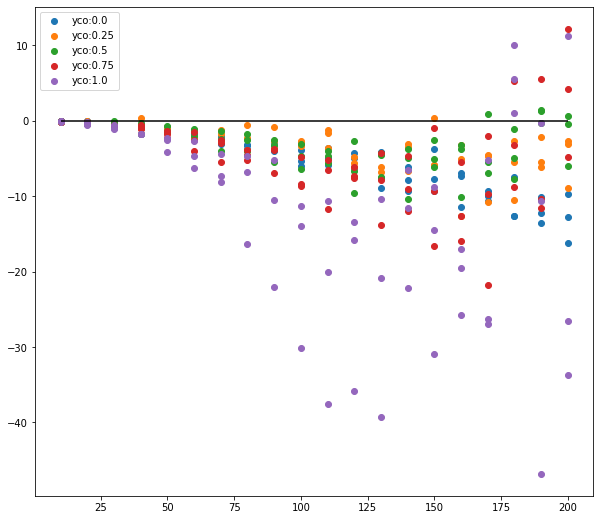

In [23]:
for y in ys:
    target_data = agg_data[agg_data.yco_res == y]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim - target_data.P_res,
        label = "yco:" + str(y)
    )
plt.hlines(y=0, xmin = 10, xmax = 200)
plt.legend()


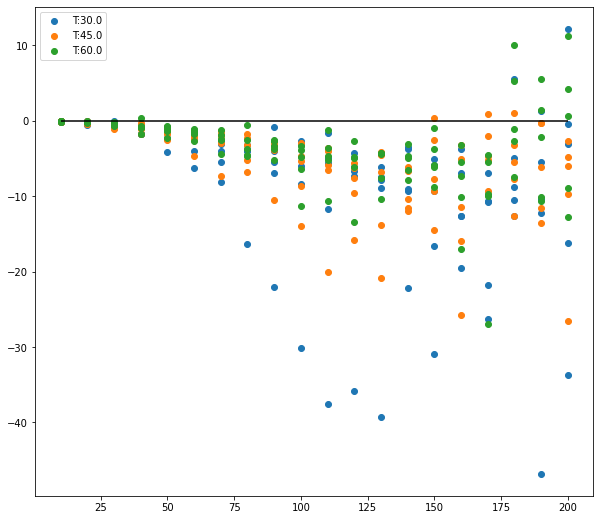

In [24]:
for T in Ts:
    target_data = agg_data[agg_data.T_res == T]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.P_sim - target_data.P_res,
        label = "T:" + str(T)
    )
plt.hlines(y=0, xmin = 10, xmax = 200)
plt.legend()

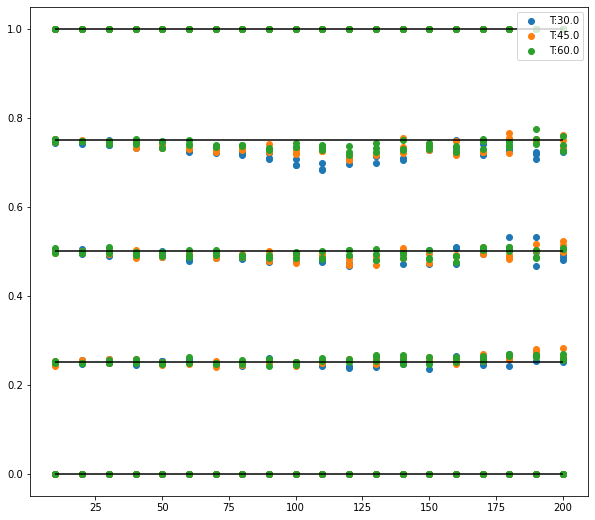

In [25]:
for T in Ts:
    target_data = output_data[output_data.T_res == T]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.yco_sim,
        label = "T:" + str(T)
    )
plt.hlines(y = 0.0, xmin = 10, xmax = 200)
plt.hlines(y = 0.25, xmin = 10, xmax = 200)
plt.hlines(y = 0.5, xmin = 10, xmax = 200)
plt.hlines(y = 0.75, xmin = 10, xmax = 200)
plt.hlines(y = 1.0, xmin = 10, xmax = 200)
plt.legend()


In [26]:
agg_data = output_data.groupby(['T_res','P_res','yco_res']).agg({'yco_sim':['mean']}).reset_index()
agg_data.columns = ['T_res','P_res','yco_res','yco_sim']
agg_data.head()

,T_res,P_res,yco_res,yco_sim
0,30.0,10.0,0.00,0.000000
1,30.0,10.0,0.25,0.249167
2,30.0,10.0,0.50,0.500117
3,30.0,10.0,0.75,0.748320
4,30.0,10.0,1.00,1.000000


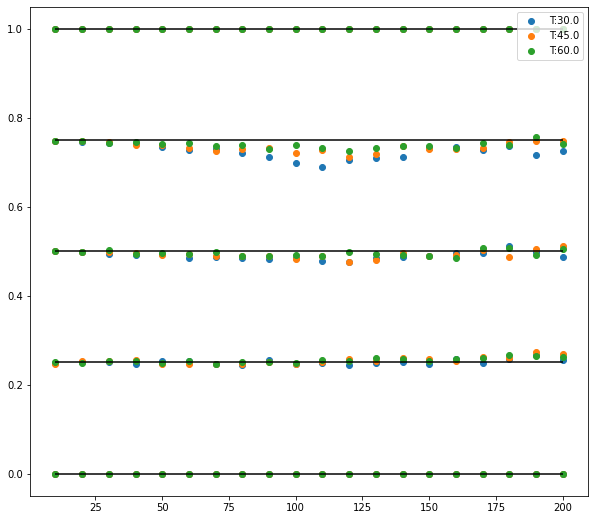

In [27]:
for T in Ts:
    target_data = agg_data[agg_data.T_res == T]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.yco_sim,
        label = "T:" + str(T)
    )
plt.hlines(y = 0.0, xmin = 10, xmax = 200)
plt.hlines(y = 0.25, xmin = 10, xmax = 200)
plt.hlines(y = 0.5, xmin = 10, xmax = 200)
plt.hlines(y = 0.75, xmin = 10, xmax = 200)
plt.hlines(y = 1.0, xmin = 10, xmax = 200)
plt.legend()

Text(0.5, 0.98, 'Comparing Execution Time per Run')

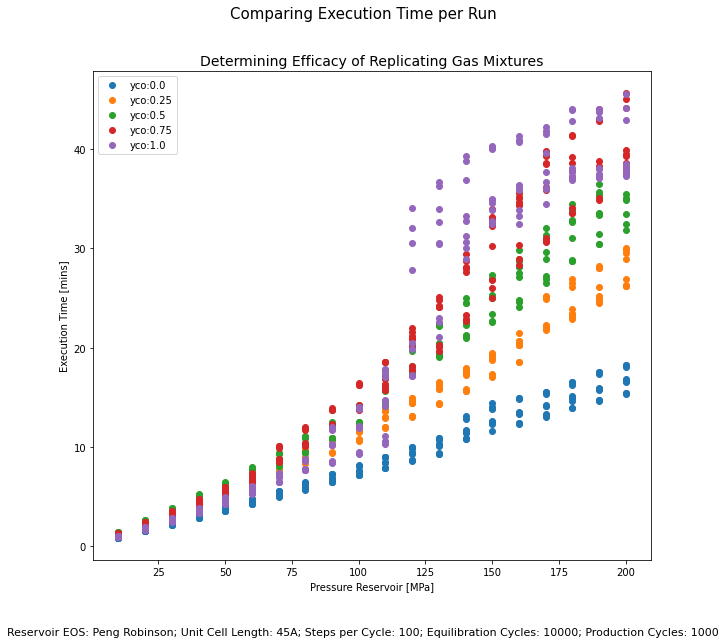

In [40]:
for y in ys:
    target_data = output_data[output_data.yco_res == y]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.time/60,
        label = "yco:" + str(y)
    )
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Execution Time [mins]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Comparing Execution Time per Run", fontsize = 15)

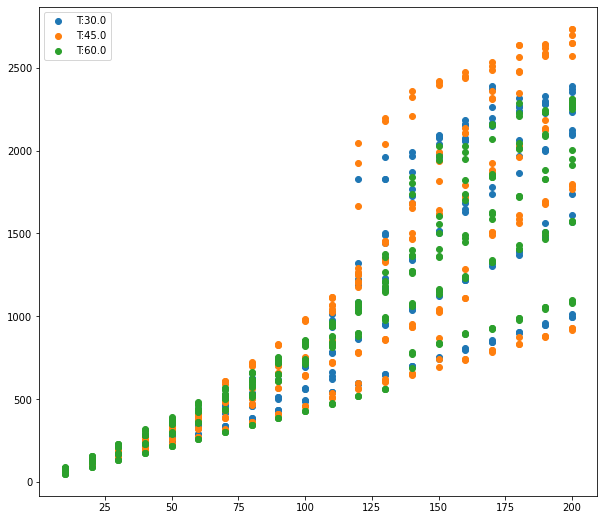

In [29]:
for T in Ts:
    target_data = output_data[output_data.T_res == T]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.time,
        label = "T:" + str(T)
    )
plt.legend()

Text(0.5, 0.98, 'Comparing Pure Methane from Simulation with Peng-Robinson')

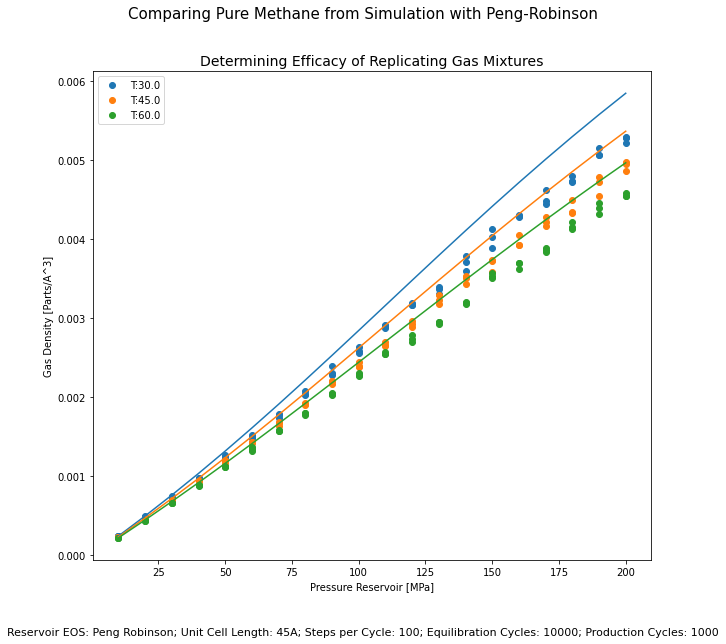

In [30]:
kb = 1.3806*10**(7) #[Pa*A^3/K]

for T in Ts:
    target_data = output_data[output_data.T_res == T]
    target_data = target_data[target_data.yco_res == 0]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.rhome,
        label = "T:" + str(T)
    )
    pv = np.linspace(10,200,20)
    rho = np.zeros(20)
    for i in range(20):
        z = PR_Zmix(pv[i], T + 273.15, 0)
        rho[i] = pv[i]*10**5/z/kb/(T+273.15)
    plt.plot(
        pv,
        rho
    )
        
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Gas Density [Parts/A^3]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Comparing Pure Methane from Simulation with Peng-Robinson", fontsize = 15)

In [31]:
np.linspace(10,200,20)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200.])

Text(0.5, 0.98, 'Comparing Pure Carbon Dioxide from Simulation with Peng-Robinson')

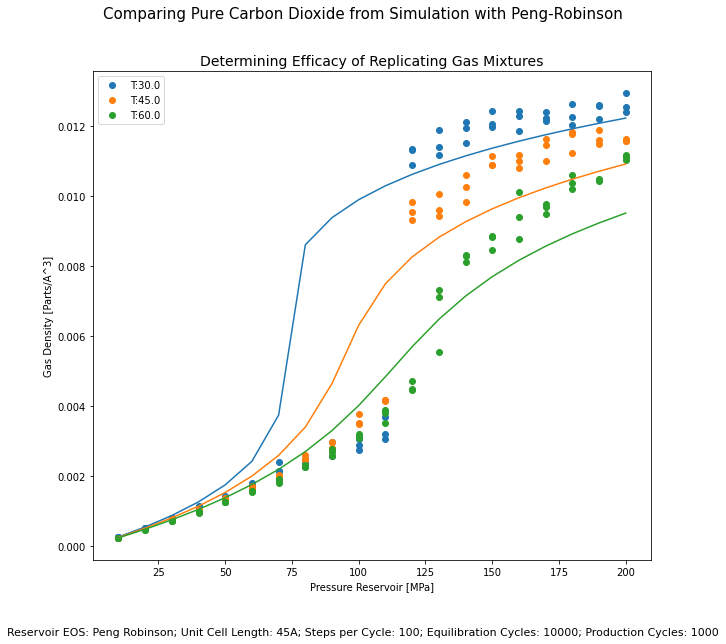

In [36]:
kb = 1.3806*10**(7) #[Pa*A^3/K]

for T in Ts:
    target_data = output_data[output_data.T_res == T]
    target_data = target_data[target_data.yco_res == 1]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.rhoco,
        label = "T:" + str(T)
    )
    pv = np.linspace(10,200,20)
    rho = np.zeros(20)
    for i in range(20):
        z = PR_Zmix(pv[i], T + 273.15, 1)
        rho[i] = pv[i]*10**5/z/kb/(T+273.15)
    plt.plot(
        pv,
        rho
    )
        
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Gas Density [Parts/A^3]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Comparing Pure Carbon Dioxide from Simulation with Peng-Robinson", fontsize = 15)

Text(0.5, 0.98, 'Comparing Mixtures from Simulation with Peng-Robinson at T = 30C')

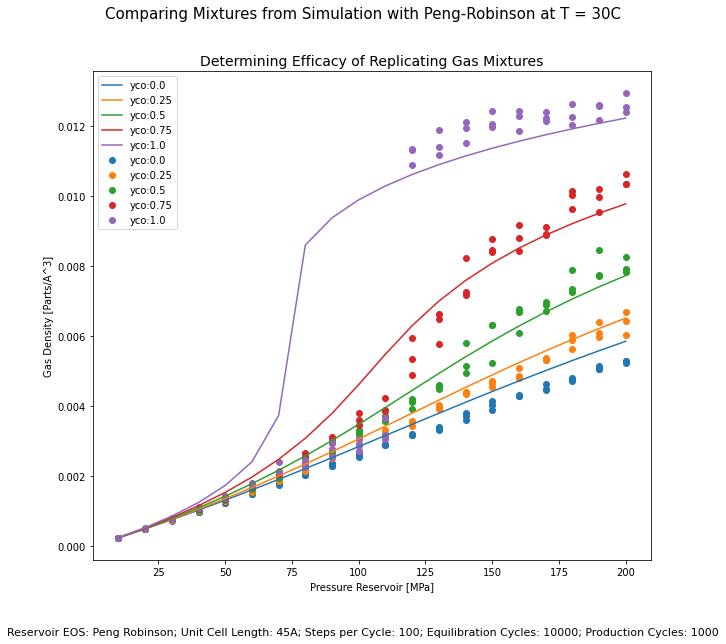

In [37]:
kb = 1.3806*10**(7) #[Pa*A^3/K]
T = 30

for y in ys:
    target_data = output_data[output_data.T_res == T]
    target_data = target_data[target_data.yco_res == y]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.rhoco + target_data.rhome,
        label = "yco:" + str(y)
    )
    pv = np.linspace(10,200,20)
    rho = np.zeros(20)
    for i in range(20):
        z = PR_Zmix(pv[i], T + 273.15, y)
        rho[i] = pv[i]*10**5/z/kb/(T+273.15)
    plt.plot(
        pv,
        rho,
        label = "yco:" + str(y)
    )
        
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Gas Density [Parts/A^3]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Comparing Mixtures from Simulation with Peng-Robinson at T = 30C", fontsize = 15)

Text(0.5, 0.98, 'Comparing Mixtures from Simulation with Peng-Robinson at T = 45C')

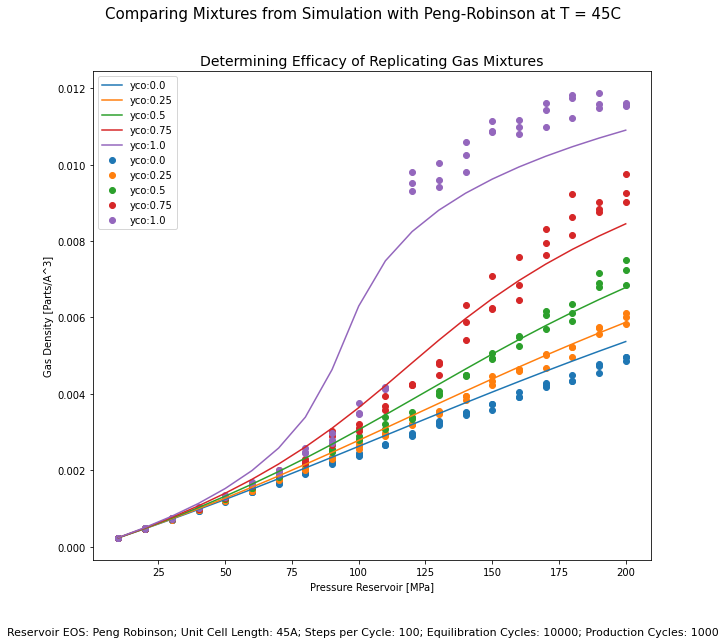

In [38]:
kb = 1.3806*10**(7) #[Pa*A^3/K]
T = 45

for y in ys:
    target_data = output_data[output_data.T_res == T]
    target_data = target_data[target_data.yco_res == y]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.rhoco + target_data.rhome,
        label = "yco:" + str(y)
    )
    pv = np.linspace(10,200,20)
    rho = np.zeros(20)
    for i in range(20):
        z = PR_Zmix(pv[i], T + 273.15, y)
        rho[i] = pv[i]*10**5/z/kb/(T+273.15)
    plt.plot(
        pv,
        rho,
        label = "yco:" + str(y)
    )
        
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Gas Density [Parts/A^3]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Comparing Mixtures from Simulation with Peng-Robinson at T = 45C", fontsize = 15)

Text(0.5, 0.98, 'Comparing Mixtures from Simulation with Peng-Robinson at T = 60C')

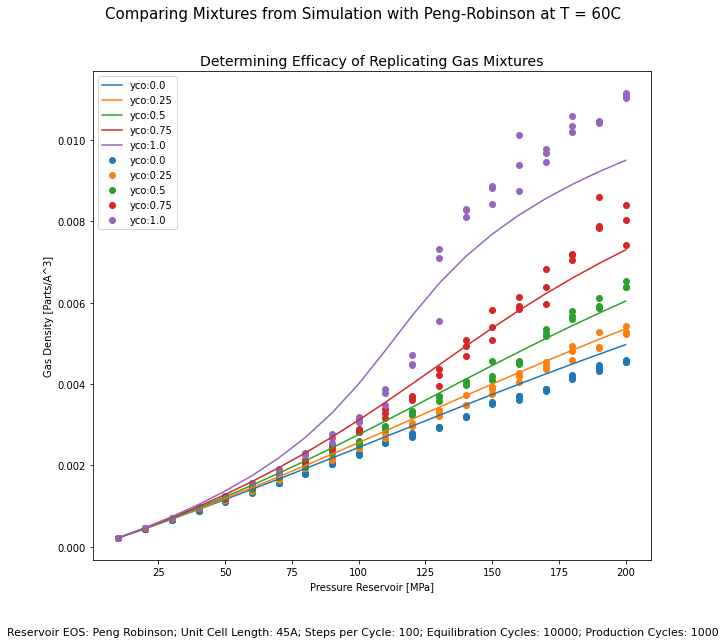

In [39]:
kb = 1.3806*10**(7) #[Pa*A^3/K]
T = 60

for y in ys:
    target_data = output_data[output_data.T_res == T]
    target_data = target_data[target_data.yco_res == y]
    plt.scatter(
        x = target_data.P_res,
        y = target_data.rhoco + target_data.rhome,
        label = "yco:" + str(y)
    )
    pv = np.linspace(10,200,20)
    rho = np.zeros(20)
    for i in range(20):
        z = PR_Zmix(pv[i], T + 273.15, y)
        rho[i] = pv[i]*10**5/z/kb/(T+273.15)
    plt.plot(
        pv,
        rho,
        label = "yco:" + str(y)
    )
        
plt.legend()
plt.xlabel("Pressure Reservoir [MPa]")
plt.ylabel("Gas Density [Parts/A^3]")
plt.figtext(0.5, 0.01, caption_txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title(title_txt, fontsize=14)
plt.suptitle("Comparing Mixtures from Simulation with Peng-Robinson at T = 60C", fontsize = 15)